# Checking the necesstiy for a ensemble model needs

In [3]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def compute_prediction_agreement(models: dict, X, visualize=True):
    """
    Compute and optionally visualize prediction agreement (%) between models.
    
    Args:
        models (dict): Model name -> model object
        X (pd.DataFrame or np.array): Input features
        visualize (bool): Whether to show heatmap
        
    Returns:
        agreement_df (pd.DataFrame): Agreement matrix (% agreement)
    """
    
    # Collect predictions
    predictions = {}
    for name, model in models.items():
        predictions[name] = model.predict(X)
    
    model_names = list(predictions.keys())
    n_models = len(model_names)
    
    # Initialize agreement matrix
    agreement_matrix = np.zeros((n_models, n_models))

    for i in range(n_models):
        for j in range(n_models):
            if i != j:
                agreement = np.mean(predictions[model_names[i]] == predictions[model_names[j]])
                agreement_matrix[i, j] = agreement

    # Build DataFrame
    agreement_df = pd.DataFrame(agreement_matrix, index=model_names, columns=model_names)

    # Show matrix
    print("\n=== PREDICTION AGREEMENT MATRIX (% SAME PREDICTIONS) ===")
    print((agreement_df * 100).round(2))  # show in %

    # Visualize
    if visualize:
        plt.figure(figsize=(8, 6))
        sns.heatmap(agreement_df * 100, annot=True, fmt=".2f", cmap="Blues")
        plt.title("Prediction Agreement Matrix (%)")
        plt.show()

    return agreement_df







=== PREDICTION AGREEMENT MATRIX (% SAME PREDICTIONS) ===
                     Random Forest  XGBoost  Decision Tree  \
Random Forest                 0.00    94.51          89.20   
XGBoost                      94.51     0.00          87.48   
Decision Tree                89.20    87.48           0.00   
Logistic Regression          88.91    89.82          82.86   
KNN                          83.49    82.27          79.94   

                     Logistic Regression    KNN  
Random Forest                      88.91  83.49  
XGBoost                            89.82  82.27  
Decision Tree                      82.86  79.94  
Logistic Regression                 0.00  78.24  
KNN                                78.24   0.00  


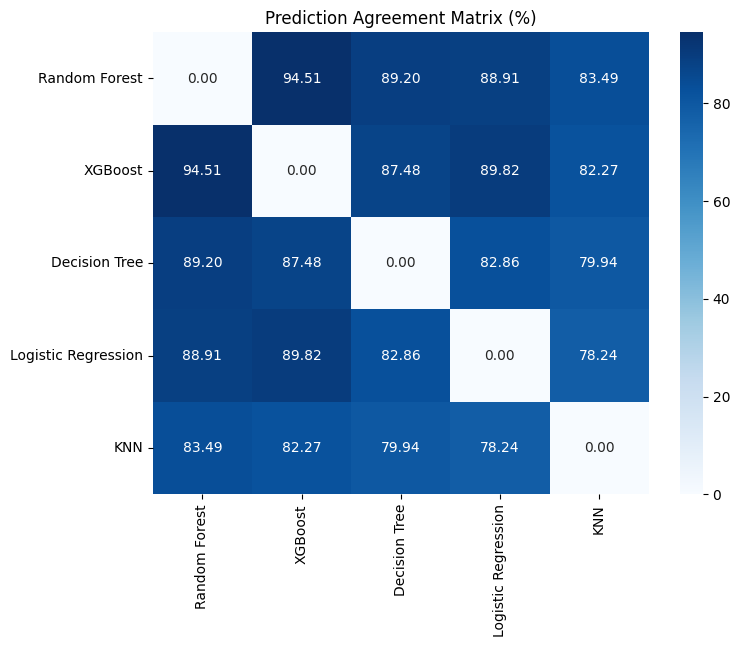

,Random Forest,XGBoost,Decision Tree,Logistic Regression,KNN
Random Forest,0.000000,0.945056,0.891954,0.889050,0.834943
XGBoost,0.945056,0.000000,0.874756,0.898208,0.822659
Decision Tree,0.891954,0.874756,0.000000,0.828578,0.799375
Logistic Regression,0.889050,0.898208,0.828578,0.000000,0.782400
KNN,0.834943,0.822659,0.799375,0.782400,0.000000


In [12]:

models = {
    "Random Forest": joblib.load(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\random_forest_best_model.pkl'),
    "XGBoost": joblib.load(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\best_xgb_model.pkl'),
    "Decision Tree": joblib.load(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\decision_tree_model.pkl'),
    "Logistic Regression": joblib.load(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\logistic_regression.pkl'),
    "KNN": joblib.load(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\best_knn_model.pkl'),
}

holdout = pd.read_csv(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\[3] full dataset preparation and baseline model evaluation\holdout_test_data.csv')
X_holdout = holdout.drop('is_canceled', axis=1)

# Run
compute_prediction_agreement(models, X_holdout)


The agreement between Random Forest and XGBoost is 94.5% → very high → these models make very similar predictions.
Agreement between other pairs → 88%-91% → also very high.
Even the weakest agreement (KNN vs Logistic Regression) is ~78% → still not very low.

→ High agreement means that models often make the same decisions.
→ This implies that adding ensemble will likely lead to only marginal improvements (if any) because there is not much complementary diversity.

The only somewhat meaningful gap is with KNN and Decision Tree, but these are also weaker models → ensembling them does not help much usually. were not the models that we had in the final rounds
Based on this, ensemble is NOT really needed or particularly beneficial here.